In [1]:
!pip install ddeint 

In [5]:
from pylab import cos, linspace, subplots
from ddeint import ddeint


# Example 1
$$
\dot{x}=x(t-\tau)
$$

In [121]:
# Program 12a: The method of steps.
# See Figure 12.1.

from sympy import integrate,symbols

xi, t, i = symbols('xi t i')

def phi(i, t):
    if i == 0:
        return 1  # Initial history x(t)=1 on [-1,0]
    else:
        return phi(i-1, i-1) - integrate(phi(i-1, xi-1), (xi, i-1, t))

tmax = 10
x = [phi(j, t) for j in range(tmax + 1)]

print('x(t) = {}'.format(x))

x(t) = [1, 1 - t, t**2/2 - 2*t + 3/2, -t**3/6 + 3*t**2/2 - 4*t + 17/6, t**4/24 - 2*t**3/3 + 15*t**2/4 - 17*t/2 + 149/24, -t**5/120 + 5*t**4/24 - 2*t**3 + 109*t**2/12 - 115*t/6 + 1769/120, t**6/720 - t**5/20 + 35*t**4/48 - 197*t**3/36 + 1061*t**2/48 - 1085*t/24 + 26239/720, -t**7/5040 + 7*t**6/720 - t**5/5 + 107*t**4/48 - 521*t**3/36 + 13081*t**2/240 - 13201*t/120 + 463609/5040, t**8/40320 - t**7/630 + 7*t**6/160 - 487*t**5/720 + 3685*t**4/576 - 27227*t**3/720 + 39227*t**2/288 - 39371*t/144 + 3157891/13440, -t**9/362880 + t**8/4480 - t**7/126 + 701*t**6/4320 - 1511*t**5/720 + 51193*t**4/2880 - 212753*t**3/2160 + 1156699*t**2/3360 - 1158379*t/1680 + 43896157/72576, t**10/3628800 - t**9/36288 + 11*t**8/8960 - 323*t**7/10080 + 1873*t**6/3456 - 89269*t**5/14400 + 279533*t**4/5760 - 7761511*t**3/30240 + 23602499*t**2/26880 - 23615939*t/13440 + 5681592251/3628800]


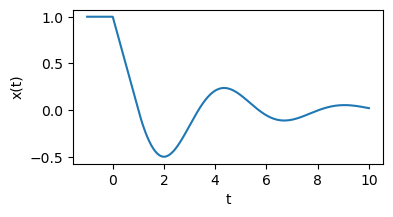

In [148]:
# Program 12b: Solution of a DDE using the method of steps.
# See Figure 12.1. The plot is a piecewise function.
# The lambda t: functions are computed in Programs 12a.

import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(-1, 10, 1000)

conditions = [t<=0, t>0, t>1, t>2, t>3, t>4, t>5, t>6, t>7, t>8, t>9]

lambdas = [
    lambda t: x[0],
    lambda t: 1-t,
    lambda t: t**2 / 2 - 2*t + 3/2,
    lambda t: -t**3 / 6 + 3*t**2 / 2 - 4*t + 17/6,
    lambda t: t**4 / 24 - 2*t**3 / 3 + 15*t**2 / 4 - 17*t / 2 + 149/24,
    lambda t: -t**5 / 120 + 5*t**4 / 24 - 2*t**3 + 109*t**2/12 - 115*t / 6 + 1769/120,
    lambda t: t**6 / 720 - t**5 / 20 + 35*t**4 / 48 - 197*t**3 / 36 + 1061*t**2 / 48 - 1085*t / 24 + 26239/720,
    lambda t: -t**7 / 5040 + 7*t**6 / 720 - t**5 / 5 + 107*t**4 / 48 - 521*t**3 / 36 + 13081*t**2 / 240 - 13201*t / 120 + 463609/5040,
    lambda t: t**8 / 40320 - t**7 / 630 + 7*t**6 / 160 - 487*t**5 / 720 + 3685*t**4 / 576 - 27227*t**3 / 720 + 39227*t**2 / 288 - 39371*t / 144 + 3157891/13440,
    lambda t: -t**9 / 362880 + t**8 / 4480 - t**7 / 126 + 701*t**6 / 4320 - 1511*t**5 / 720 + 51193*t**4 / 2880 - 212753*t**3 / 2160 + 1156699*t**2 / 3360 - 1158379*t / 1680 + 43896157/72576,
    lambda t: t**10 / 3628800 - t**9 / 36288 + 11*t**8 / 8960 - 323*t**7 / 10080 + 1873*t**6 / 3456 - 89269*t**5 / 14400 + 279533*t**4 / 5760 - 7761511*t**3 / 30240 + 23602499*t**2 / 26880 - 23615939*t / 13440 + 5681592251/3628800
]
plt.figure(figsize=(4, 2))
plt.plot(t, np.piecewise(t, conditions, lambdas))

plt.xlabel('t')#, fontsize=25)
plt.ylabel('x(t)')#, fontsize=25)
#plt.tick_params(labelsize=25)
plt.show()


## Example 3 on page 302 from the book. 
$$
\dot{x} = μx(t)(1 − x(t − τ)),
$$

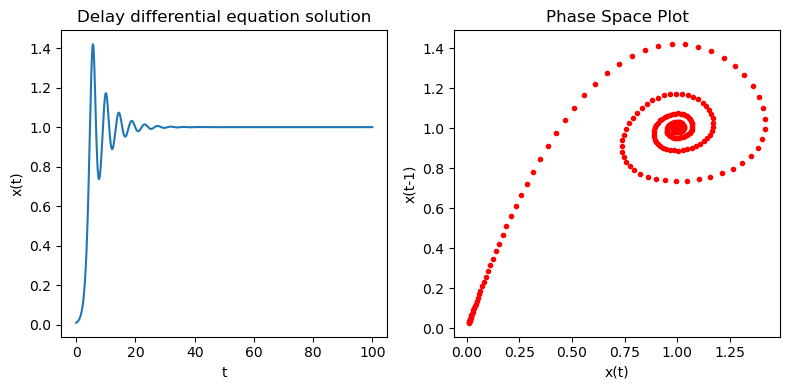

In [136]:

# We solve the following system:
# dx/dt = mu*x(t)*(1-x(t-d))
# with the initial condition x(t) = 0.1 for t < 0

mu=1.2
tau = 1
num_pr_tau=10 
deltat=tau/num_pr_tau
nsteps=1000
def values_before_zero(t):
    return 0.01 # Initial condition for t < 0

def model(X, t, tau):
    x = X(t)
    xd = X(t - tau)
    return mu*x*(1-xd)

tt = linspace(0, deltat*nsteps, nsteps)
yy = ddeint(model, values_before_zero, tt,fargs=(tau,))

fig, (ax, ax2) = subplots(1, 2, figsize=(8, 4))
ax.plot(tt, yy)
ax.set_xlabel('t')
ax.set_ylabel('x(t)')
ax.set_title('Delay differential equation solution')


ax2.plot(yy[:-num_pr_tau], yy[  num_pr_tau:], 'r.')
ax2.set_xlabel('x(t)')
ax2.set_ylabel('x(t-1)')
ax2.set_title('Phase Space Plot')
fig.tight_layout()



# Example 2
Solve the simple linear DDE (12.2) with initial history functions on [−1, 0] given by: 

(a) $x(t) = e^t$

(b) $x(t) = t^2$;

(c) $x(t) = t$ 

(d) $x(t) = sin(t)$

Copy down the cell for Example 3.

# SIR model with delay
$$
\begin{array}{rcl}
\dot{S} &=& -\beta I S +\alpha R\\
\dot{I} &=& \beta I S - \gamma I\\
\dot{R} &=& \gamma I -\alpha R
\end{array}
$$
Put some delays in the model. Example, 
$$
\begin{array}{rcl}
\dot{S} &=& -\beta I S +\alpha R_\tau\\
\dot{I} &=& \beta I S - \gamma I\\
\dot{R} &=& \gamma I -\alpha R
\end{array}
$$

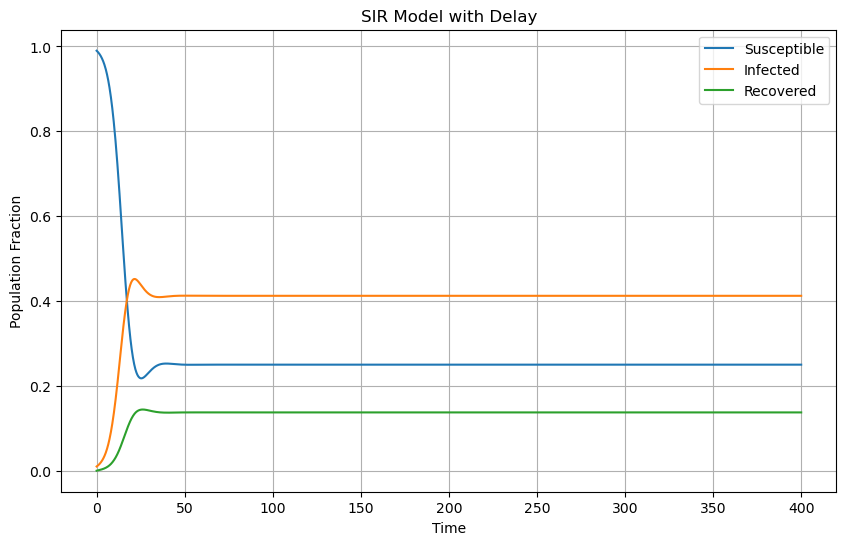

In [170]:
from ddeint import ddeint

import matplotlib.pyplot as plt

# Parameters
beta = 0.4  # Infection rate
gamma = 0.1 # Recovery rate
alpha= 0.3  # Rate of immunity loss
tau = 5  # Delay try 5, 500, 50

# Initial conditions
def initial_conditions(t):
    return [0.99, 0.01, 0.0]  # S, I, R for all t < 0

# SIR model with delay
def sir_model(X, t, tau):
    S, I, R = X(t)
    Sd, Id, Rd = X(t - tau)
    dSdt = -beta * S * I+ alpha*Rd
    dIdt = beta * S * I - gamma * I
    dRdt = gamma * I-alpha*R
    return [dSdt, dIdt, dRdt]

# Time points
maxtime= 400
time = linspace(0, maxtime, int(maxtime / 0.1) + 1)
#time = linspace(0, 400, 3999)


# Solve the DDE
solution = ddeint(sir_model, initial_conditions, time, fargs=(tau,))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(time, solution[:, 0], label='Susceptible')
plt.plot(time, solution[:, 1], label='Infected')
plt.plot(time, solution[:, 2], label='Recovered')
plt.xlabel('Time')
plt.ylabel('Population Fraction')
plt.title('SIR Model with Delay')
plt.legend()
plt.grid()
plt.show()

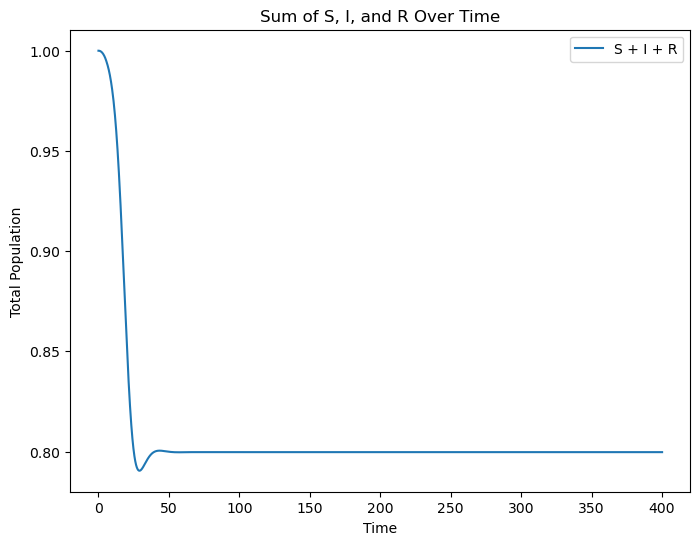

In [171]:
# Calculate the sum S + I + R
total_population = solution[:, 0] + solution[:, 1] + solution[:, 2]

# Plot the result
plt.figure(figsize=(8, 6))
plt.plot(time, total_population, label='S + I + R')
plt.xlabel('Time')
plt.ylabel('Total Population')
plt.title('Sum of S, I, and R Over Time')
plt.legend()
#plt.grid()
plt.show()

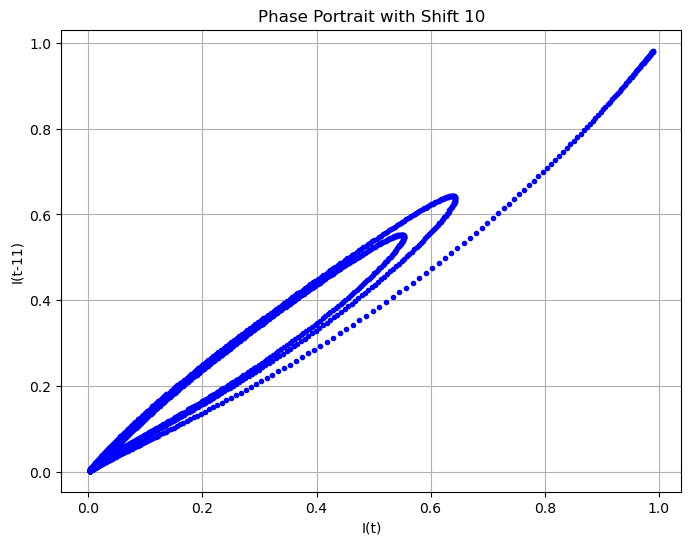

In [145]:
plt.figure(figsize=(8, 6))
plt.plot(solution[:-11, 0], solution[11:, 0], 'b.')
plt.xlabel('I(t)')
plt.ylabel('I(t-11)')
plt.title('Phase Portrait with Shift 10')
plt.grid()
plt.show()